In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC

In [2]:
#Import the train csv.
data_train = pd.read_csv("C:/Users/Agriya/Desktop/Data Science/My Practice and Learning/Final Project/Final Project Datasets/Project Statement - PHARMA/train.csv")

In [3]:
#Import the test csv.
data_train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
data_test = pd.read_csv("C:/Users/Agriya/Desktop/Data Science/My Practice and Learning/Final Project/Final Project Datasets/Project Statement - PHARMA/test.csv")

In [5]:
data_test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [6]:
data_train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F0B5E6630>,
      dtype=object)

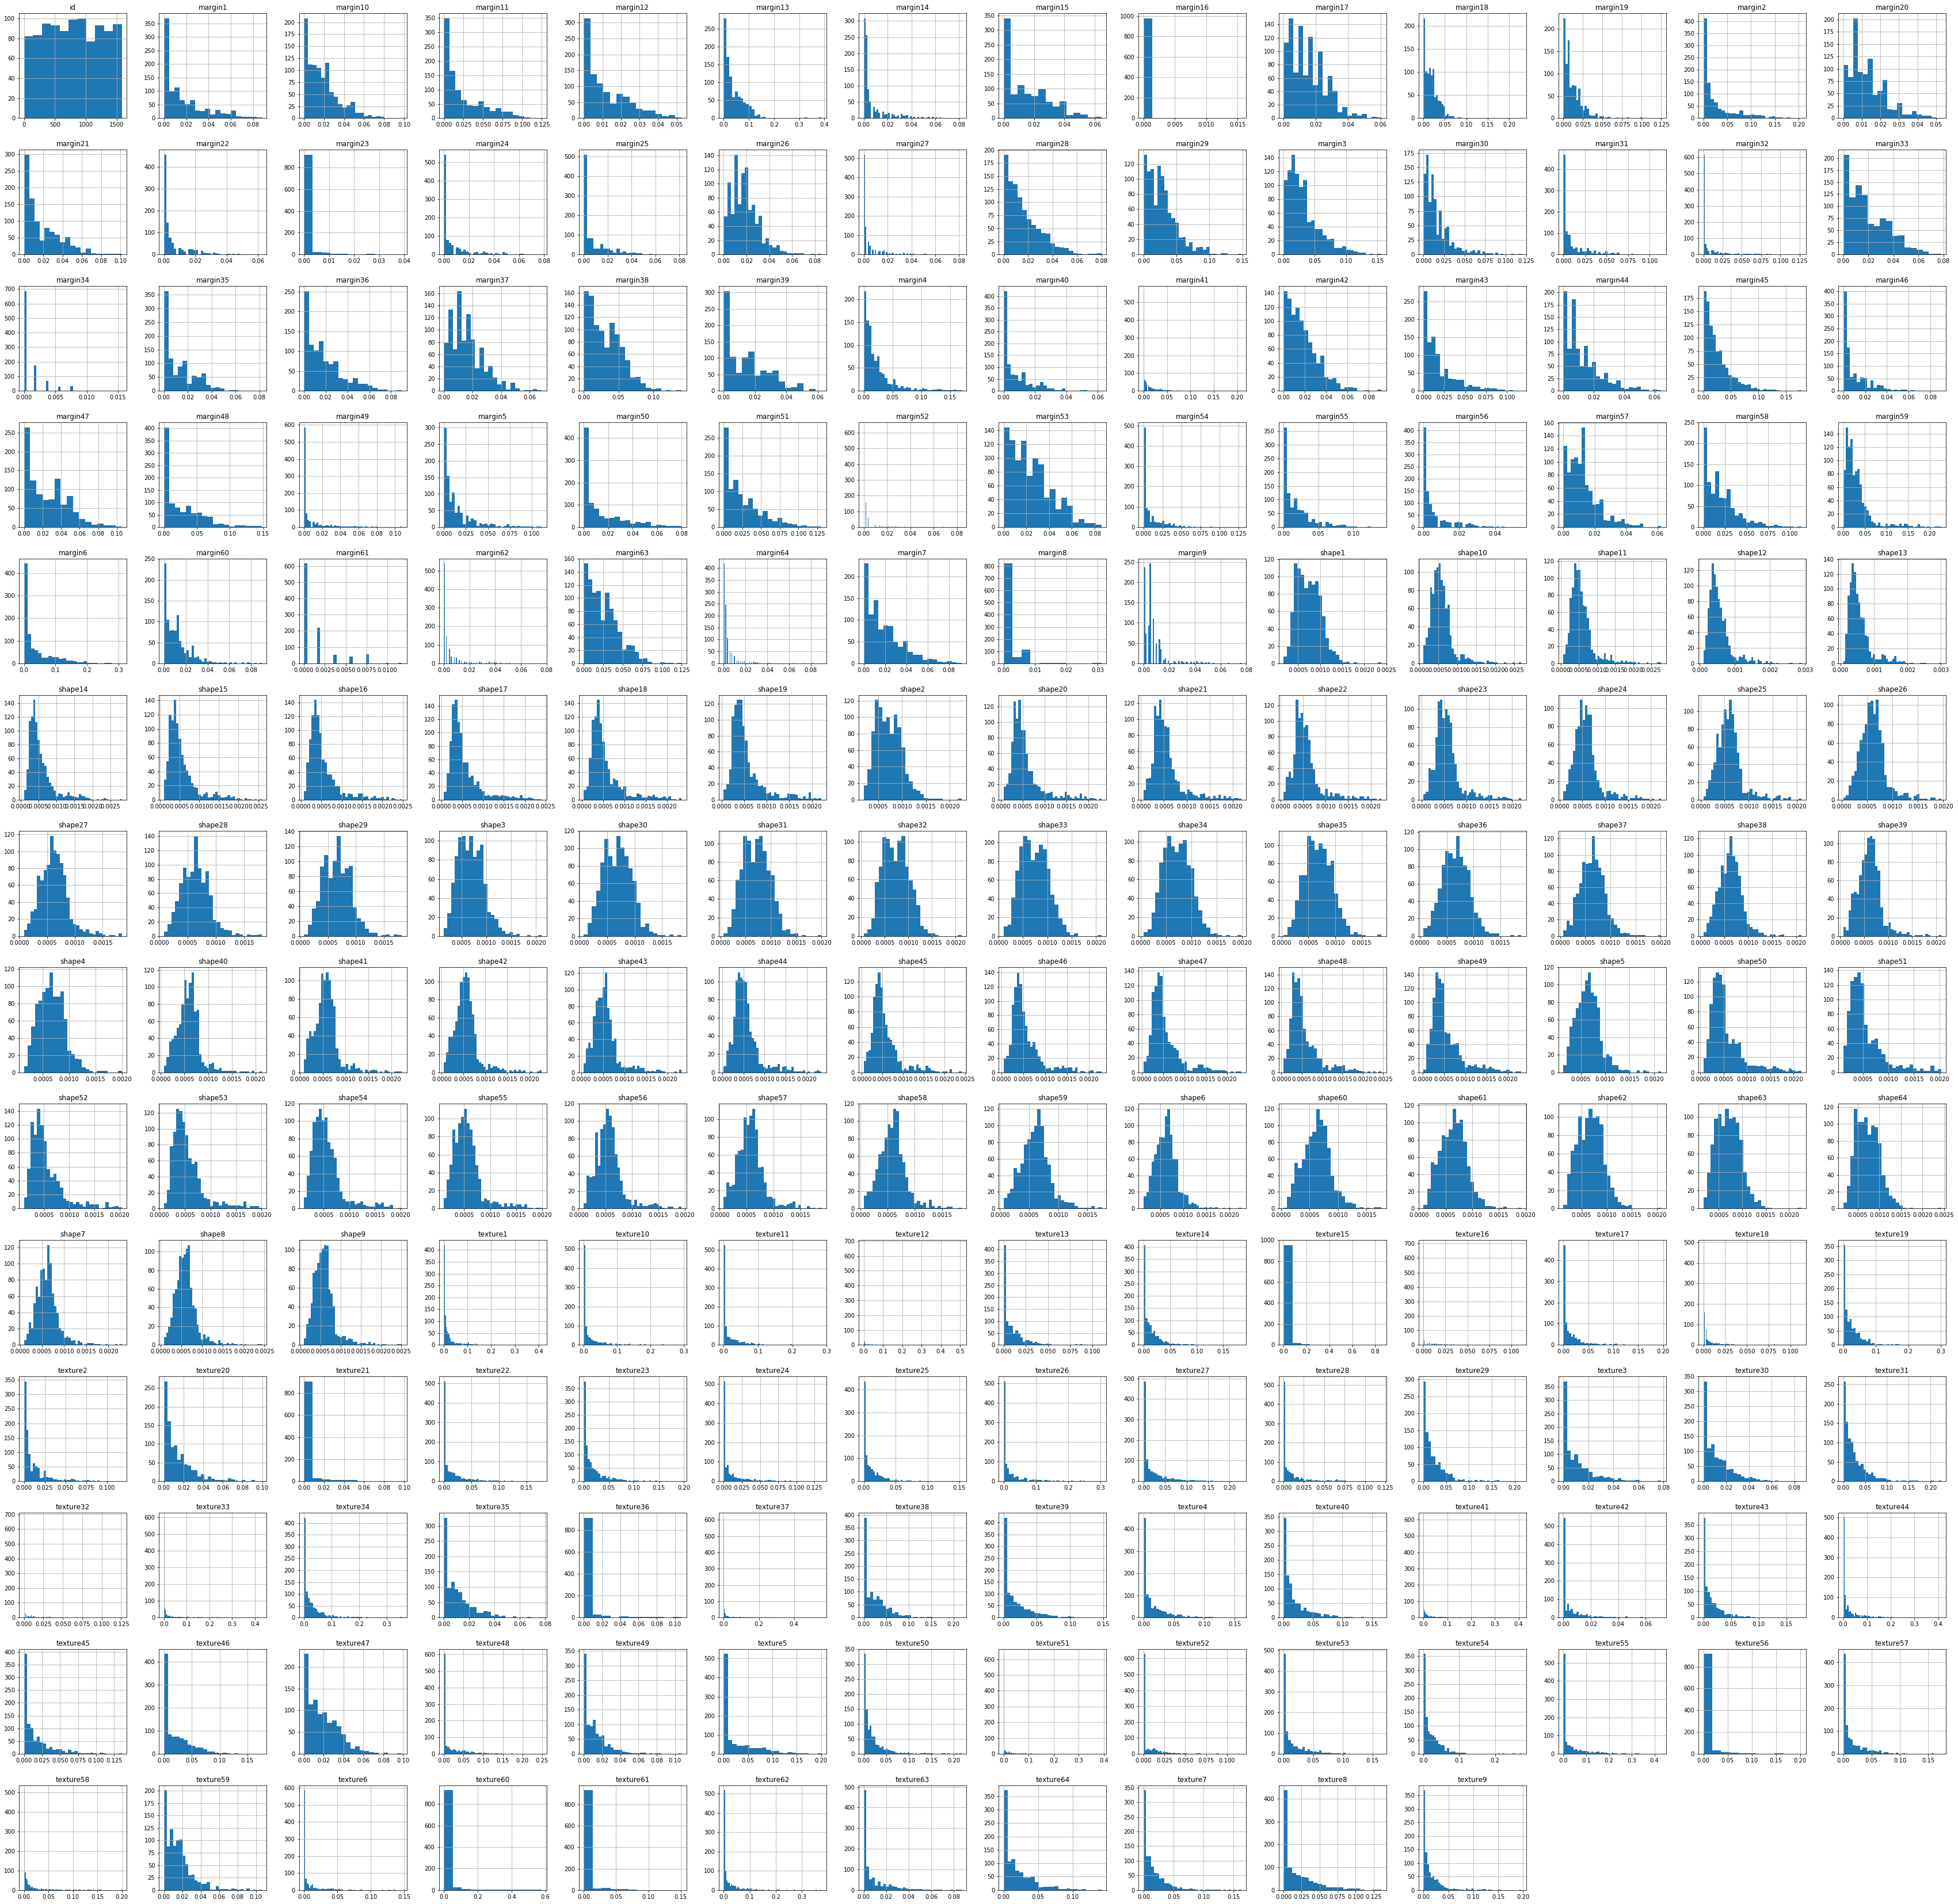

In [60]:
data_train.hist(bins = "auto" , figsize = (60,60))

In [61]:
data_train.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [62]:
data_train.shape

(990, 194)

In [7]:
X = data_train.drop(["id","species"], axis = 1)

In [8]:
X.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [68]:
X.isnull().sum()

margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
margin6      0
margin7      0
margin8      0
margin9      0
margin10     0
margin11     0
margin12     0
margin13     0
margin14     0
margin15     0
margin16     0
margin17     0
margin18     0
margin19     0
margin20     0
margin21     0
margin22     0
margin23     0
margin24     0
margin25     0
margin26     0
margin27     0
margin28     0
margin29     0
margin30     0
            ..
texture35    0
texture36    0
texture37    0
texture38    0
texture39    0
texture40    0
texture41    0
texture42    0
texture43    0
texture44    0
texture45    0
texture46    0
texture47    0
texture48    0
texture49    0
texture50    0
texture51    0
texture52    0
texture53    0
texture54    0
texture55    0
texture56    0
texture57    0
texture58    0
texture59    0
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64

In [9]:
Y_Original = data_train[["species"]]

In [10]:
Y_Original.isnull().sum()

species    0
dtype: int64

In [11]:
Y_Original.groupby("species").size()

species
Acer_Capillipes                 10
Acer_Circinatum                 10
Acer_Mono                       10
Acer_Opalus                     10
Acer_Palmatum                   10
Acer_Pictum                     10
Acer_Platanoids                 10
Acer_Rubrum                     10
Acer_Rufinerve                  10
Acer_Saccharinum                10
Alnus_Cordata                   10
Alnus_Maximowiczii              10
Alnus_Rubra                     10
Alnus_Sieboldiana               10
Alnus_Viridis                   10
Arundinaria_Simonii             10
Betula_Austrosinensis           10
Betula_Pendula                  10
Callicarpa_Bodinieri            10
Castanea_Sativa                 10
Celtis_Koraiensis               10
Cercis_Siliquastrum             10
Cornus_Chinensis                10
Cornus_Controversa              10
Cornus_Macrophylla              10
Cotinus_Coggygria               10
Crataegus_Monogyna              10
Cytisus_Battandieri             10
Eucalyptus_G

In [12]:
input = LabelEncoder()

In [13]:
Y = input.fit_transform(data_train[["species"]])

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
label_mapping = {index:label for index, label in enumerate(input.classes_)}

In [15]:
label_mapping

{0: 'Acer_Capillipes',
 1: 'Acer_Circinatum',
 2: 'Acer_Mono',
 3: 'Acer_Opalus',
 4: 'Acer_Palmatum',
 5: 'Acer_Pictum',
 6: 'Acer_Platanoids',
 7: 'Acer_Rubrum',
 8: 'Acer_Rufinerve',
 9: 'Acer_Saccharinum',
 10: 'Alnus_Cordata',
 11: 'Alnus_Maximowiczii',
 12: 'Alnus_Rubra',
 13: 'Alnus_Sieboldiana',
 14: 'Alnus_Viridis',
 15: 'Arundinaria_Simonii',
 16: 'Betula_Austrosinensis',
 17: 'Betula_Pendula',
 18: 'Callicarpa_Bodinieri',
 19: 'Castanea_Sativa',
 20: 'Celtis_Koraiensis',
 21: 'Cercis_Siliquastrum',
 22: 'Cornus_Chinensis',
 23: 'Cornus_Controversa',
 24: 'Cornus_Macrophylla',
 25: 'Cotinus_Coggygria',
 26: 'Crataegus_Monogyna',
 27: 'Cytisus_Battandieri',
 28: 'Eucalyptus_Glaucescens',
 29: 'Eucalyptus_Neglecta',
 30: 'Eucalyptus_Urnigera',
 31: 'Fagus_Sylvatica',
 32: 'Ginkgo_Biloba',
 33: 'Ilex_Aquifolium',
 34: 'Ilex_Cornuta',
 35: 'Liquidambar_Styraciflua',
 36: 'Liriodendron_Tulipifera',
 37: 'Lithocarpus_Cleistocarpus',
 38: 'Lithocarpus_Edulis',
 39: 'Magnolia_Heptape

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 12)

In [18]:
model_RandomForest = RandomForestClassifier()

In [19]:
model_RandomForest.fit(X_train,Y_train)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
predict_Y = model_RandomForest.predict(X_test)

In [24]:
print("Accuracy Score - Random Forest : ", accuracy_score(Y_test, predict_Y))
print("Confusion Matrix - Random Forest : ", confusion_matrix(Y_test, predict_Y))
print("Classification Report - Random Forest : ", classification_report(Y_test, predict_Y))

Accuracy Score - Random Forest :  0.8333333333333334
Confusion Matrix - Random Forest :  [[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
Classification Report - Random Forest :                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       0.60      1.00      0.75         3
           9       1.00      1.00      1.00         3
          10       0.75      1.00      0.86         3
          11       0.67      1.00      0.80         2
          13       0.75      1.00      0.86    

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\li

In [89]:
model_DecisionTree = DecisionTreeClassifier()

In [90]:
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
predict_Y = model_DecisionTree.predict(X_test)

In [92]:
print("Accuracy Score - Decision Tree : ", accuracy_score(Y_test, predict_Y))
print("Confusion Matrix - Decision Tree : ", confusion_matrix(Y_test, predict_Y))
print("Classification Report - Decision Tree : ", classification_report(Y_test, predict_Y))

Accuracy Score - Decision Tree :  0.6212121212121212
Confusion Matrix - Decision Tree :  [[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Classification Report - Decision Tree :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       0.50      1.00      0.67         1
           8       1.00      0.67      0.80         3
           9       0.75      1.00      0.86         3
          10       0.67      0.67      0.67         3
          11       0.50      0.50      0.50         2
          13       0.00      0.00      0.00    

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\li

In [93]:
model_svm = SVC(kernel = "rbf")

In [94]:
model_svm.fit(X_train,Y_train)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [95]:
predict_Y = model_svm.predict(X_test)

In [96]:
print("Accuracy Score - SVM : ", accuracy_score(Y_test, predict_Y))
print("Confusion Matrix - SVM : ", confusion_matrix(Y_test, predict_Y))
print("Classification Report - SVM : ", classification_report(Y_test, predict_Y))

Accuracy Score - SVM :  0.0
Confusion Matrix - SVM :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report - SVM :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00     

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\li

In [97]:
model_Nayve = GaussianNB()

In [98]:
model_Nayve.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
predict_Y = model_Nayve.predict(X_test)

In [100]:
print("Accuracy Score - Nayve : ", accuracy_score(Y_test, predict_Y))
print("Confusion Matrix - Nayve : ", confusion_matrix(Y_test, predict_Y))
print("Classification Report - Nayve : ", classification_report(Y_test, predict_Y))

Accuracy Score - Nayve :  0.5303030303030303
Confusion Matrix - Nayve :  [[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Classification Report - Nayve :                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         1
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         3
          10       0.75      1.00      0.86         3
          11       0.40      1.00      0.57         2
          12       0.00      0.00      0.00         0
          13     

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Agriya\Anaconda3\li

In [102]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X,Y)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
data_test_temp = data_test.drop(["id"],axis = 1)

In [105]:
final_prediction_Y = model_RandomForest.predict(data_test_temp)

In [106]:
data_test["Result"] = final_prediction_Y

In [107]:
data_test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,Result
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711,51
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922,50
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000,1
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789,19
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812,14


In [112]:
data_test[["id","Result"]].to_csv("C:/Users/Agriya/Desktop/Data Science/My Practice and Learning/Final Project/Final Project Code/Final_result.csv")

In [111]:
data_test[["id","Result"]].head()

,id,Result
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14
